<a href="https://colab.research.google.com/github/seyiberom/data-repository/blob/main/Another_copy_of_Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import requests
import plotly.express as px

import seaborn as sns
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import preprocessing, svm
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
filename = 'bank-additional-full.csv'

if not os.path.exists(filename):
  print("Data not present locally... Fetching....")

  with open(filename,'w', encoding="utf-8") as f:
    url = f"https://raw.githubusercontent.com/seyiberom/data-repository/main/{filename}"
    data = requests.get(url).text
    f.write(data)
df = pd.read_csv(filename, header=[0], sep=";")
pd.set_option('display.max_columns', None)
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#check for missing values
missing_values = df.isna()
print(missing_values)
# our chcek reveal that no value missing

         age    job  marital  education  default  housing   loan  contact  \
0      False  False    False      False    False    False  False    False   
1      False  False    False      False    False    False  False    False   
2      False  False    False      False    False    False  False    False   
3      False  False    False      False    False    False  False    False   
4      False  False    False      False    False    False  False    False   
...      ...    ...      ...        ...      ...      ...    ...      ...   
41183  False  False    False      False    False    False  False    False   
41184  False  False    False      False    False    False  False    False   
41185  False  False    False      False    False    False  False    False   
41186  False  False    False      False    False    False  False    False   
41187  False  False    False      False    False    False  False    False   

       month  day_of_week  duration  campaign  pdays  previous  poutcome  \

In [ ]:

#check statistical averages in numerical data to gain an isight
df.describe()



,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# Visualization of data to gain an insight into it
# first we try to see how the age group after the decsion if any. We group the ages and see any possible relationship
# we elected six age group 0-40, 41-50, 51-60, 61-70, 71-80 and 80-100
# we then plot a bar graph
age_group = [ [0]* 6 for i in range(2)]

#age group 31-40
df2 = df[~((df['age'] > 20))]
df3 = df2[['age', 'y']]
t = df3.groupby('y').size()
age_group[0][0] = t[0]
age_group[1][0] = t[1]
#age group 41-50
df2 = df[~((df['age'] < 21) | (df['age'] > 30))]
df3 = df2[['age', 'y']]
t = df3.groupby('y').size()

age_group[0][1] = t[0]
age_group[1][1] = t[1]
#age group 51-60
df2 = df[~((df['age'] < 31) | (df['age'] >40))]
df3 = df2[['age', 'y']]
t = df3.groupby('y').size()
age_group[0][2] = t[0]
age_group[1][2] = t[1]
#age group 61-70
df2 = df[~((df['age'] < 41) | (df['age'] >50))]
df3 = df2[['age', 'y']]
t = df3.groupby('y').size()
age_group[0][3] = t[0]
age_group[1][3] = t[1]
#age group 71-80
df2 = df[~((df['age'] < 51) | (df['age'] >60))]
df3 = df2[['age', 'y']]
t = df3.groupby('y').size()
age_group[0][4] = t[0]
age_group[1][4] = t[1]
#age group 81 to 100
df2 = df[~((df['age'] < 61))]
df3 = df2[['age', 'y']]
t = df3.groupby('y').size()
age_group[0][5] = t[0]
age_group[1][5] = t[1]


age_array = pd.DataFrame(age_group, columns=["0-20", "21-30", "31-40", "41-50", "51-60", "60-99"])
age_array.head()

,0-20,21-30,31-40,41-50,51-60,60-99
0,83,6176,14788,9403,5602,496
1,57,1067,1597,837,668,414


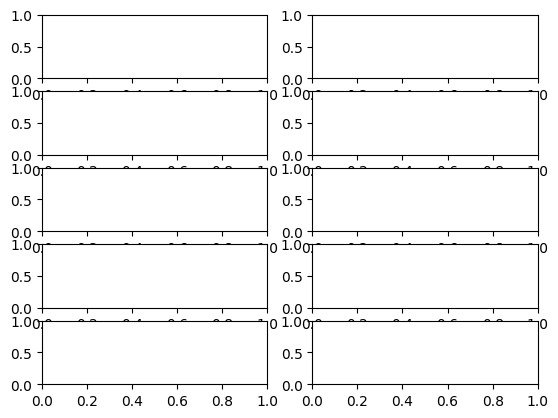

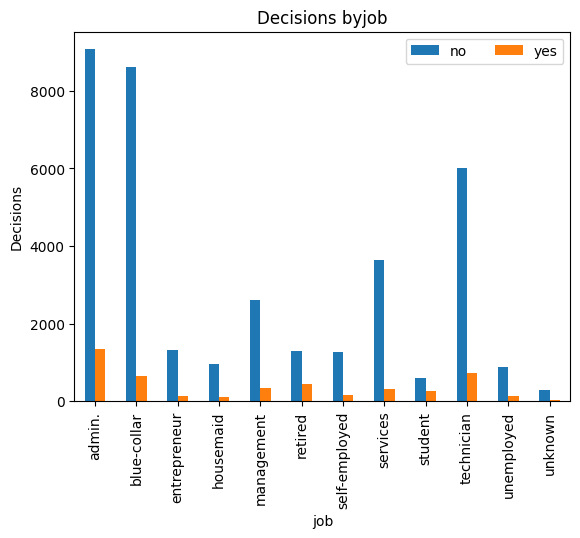

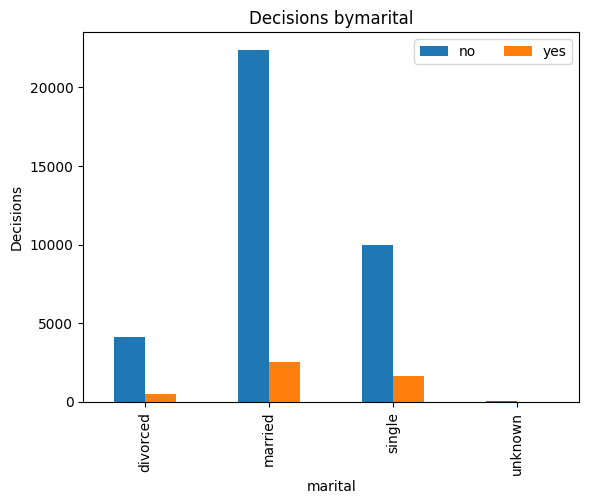

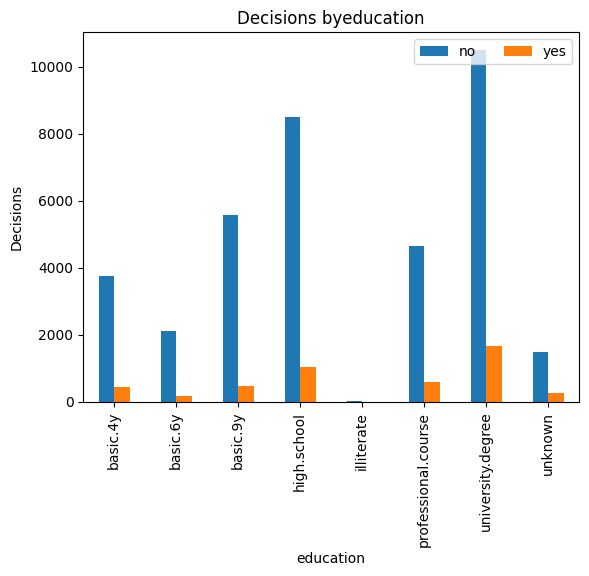

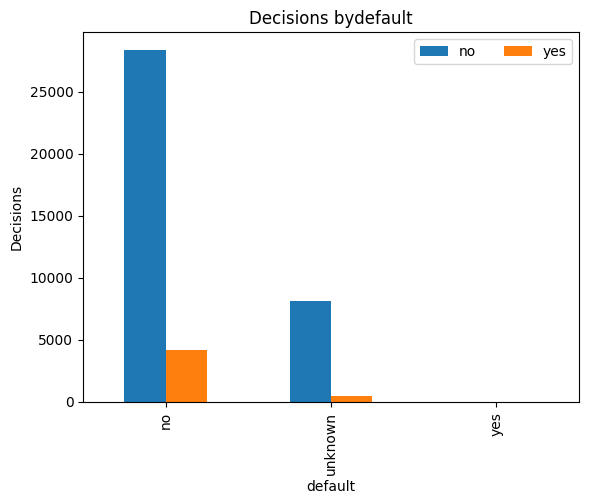

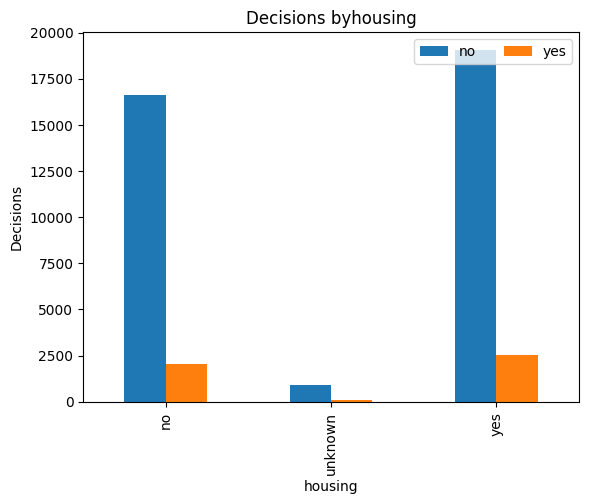

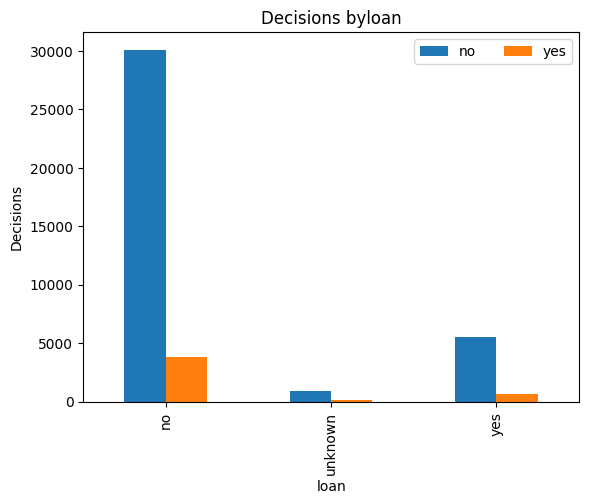

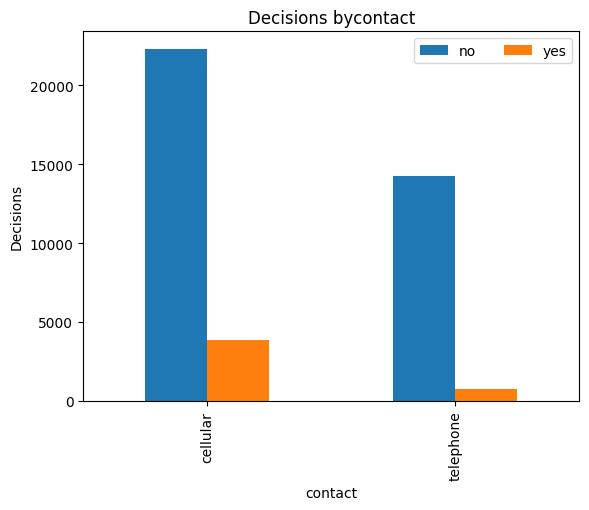

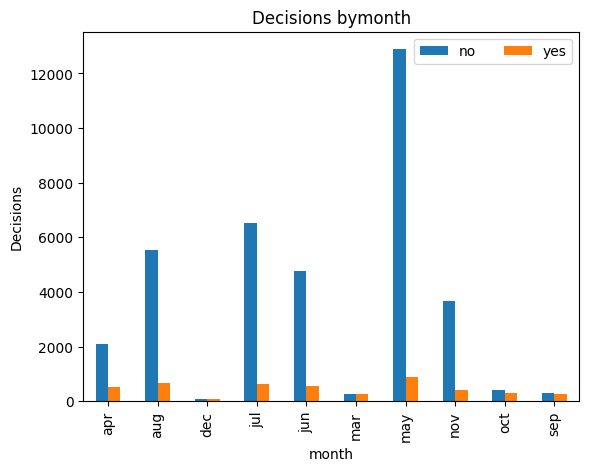

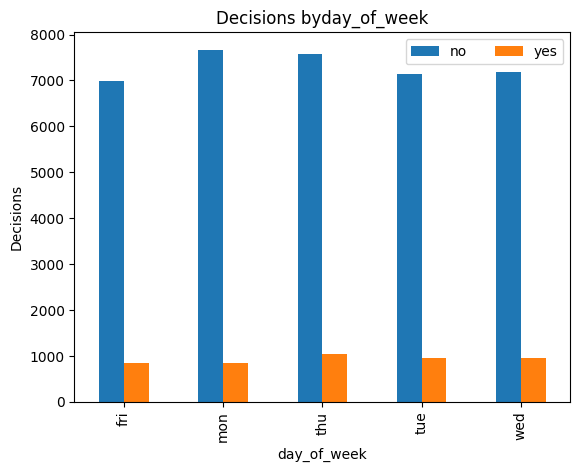

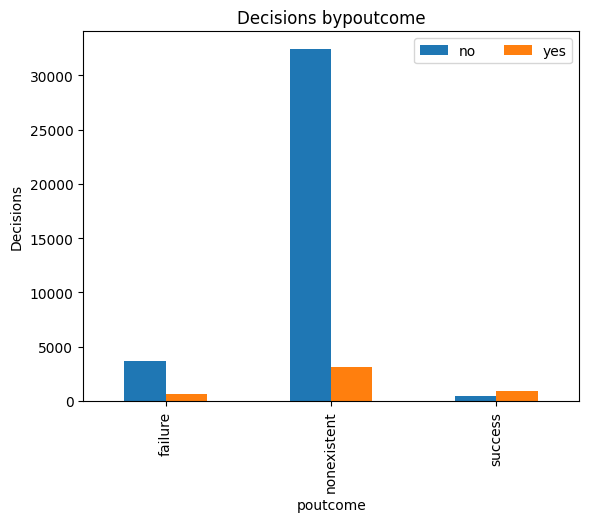

In [ ]:
#Plot bar group




fig, axs = plt.subplots(5,2)

column_chart = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome" ]
i = 0
j = 0
for colu in column_chart:
    axs[i,j] = df.groupby([colu]).y.value_counts().reset_index(name='counts').pivot(index=colu, columns='y', values="counts").plot(kind="bar")
    axs[i,j].set_ylabel('Decisions')
    axs[i,j].set_title('Decisions by' +  colu)
    axs[i,j].legend(loc='upper right', ncols=2)
    if j == 1:
        i = i + 1
        j = 0
    else:
     j = j + 1


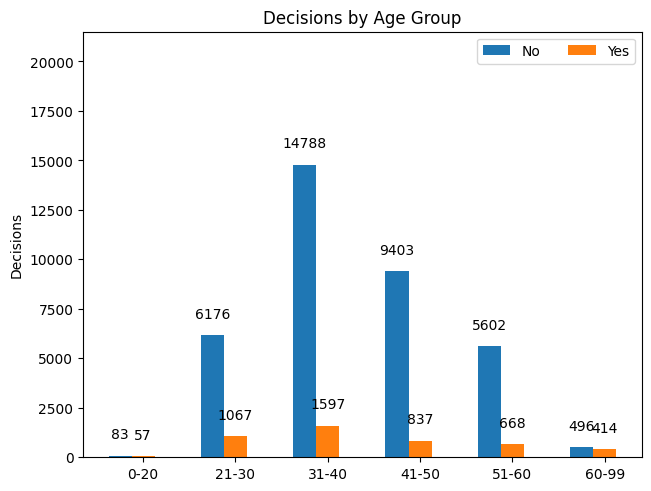

In [ ]:
species = age_array.columns.values.copy()
tuple1 = [tuple(x) for x in age_array.values]
penguin_means = {
    'No': tuple1[0],
    'Yes': tuple1[1],
}
x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig,  ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=10)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decisions')
ax.set_title('Decisions by Age Group')
ax.set_xticks(x + width, species)
ax.legend(loc='upper right', ncols=2)
ax.set_ylim(0, 21500)
# other columnc for group bar chart
plt.show()


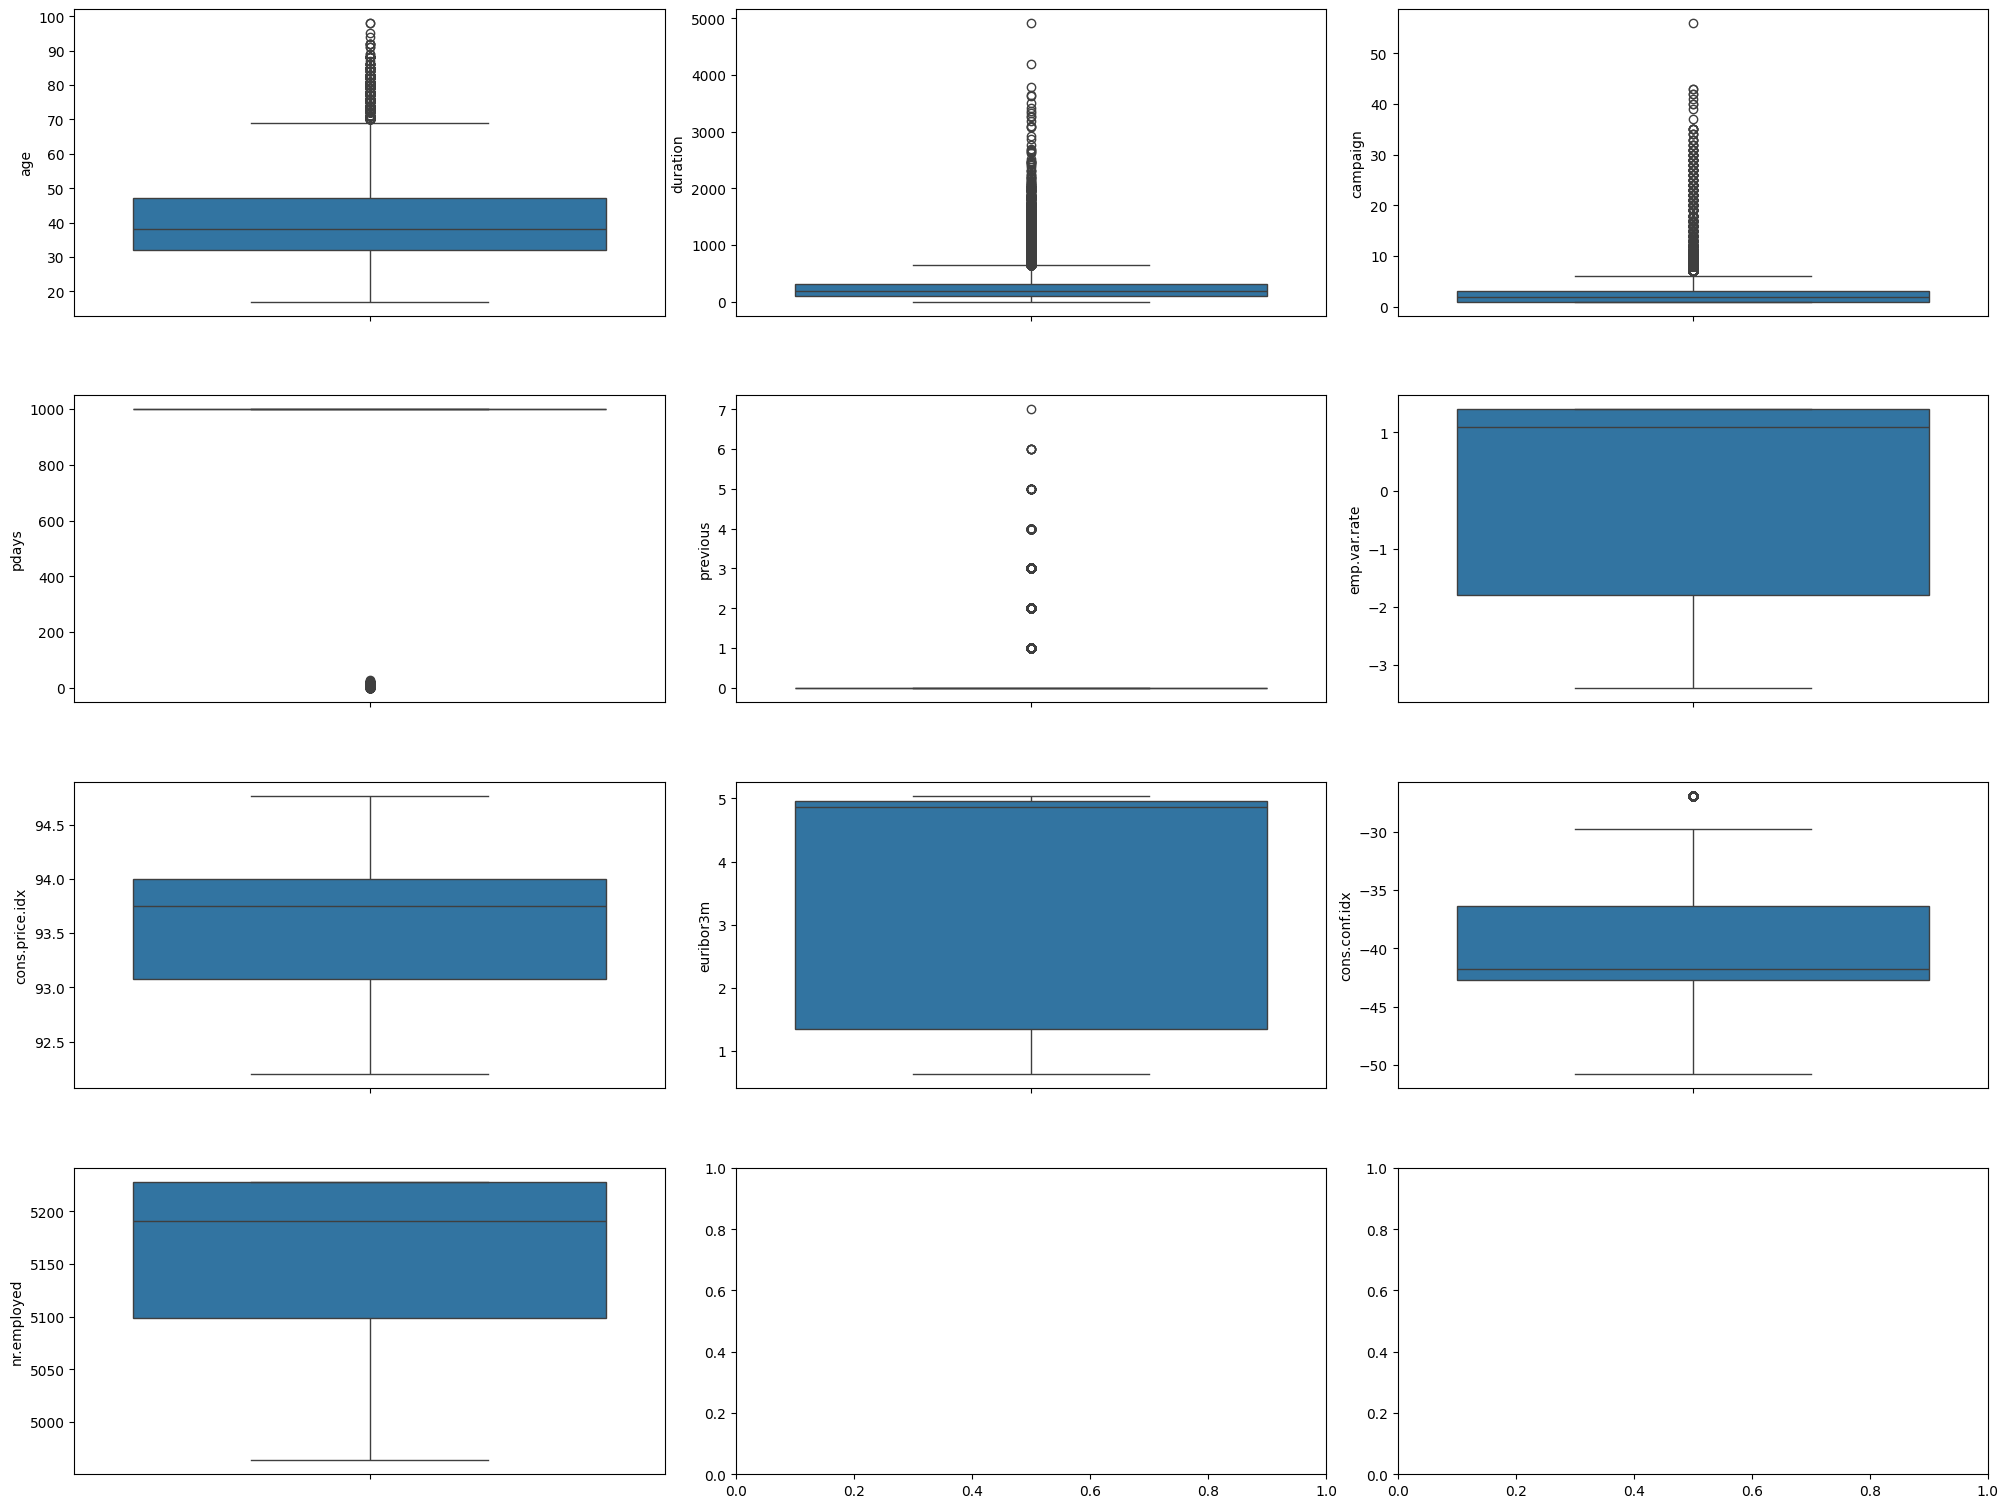

In [ ]:
# check if we have outliers in the numeric features
X = df[["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "euribor3m","cons.conf.idx", "nr.employed"]]
X.head()
#replace value of feature "y" with 0 and 1
df.loc[df["y"] == "yes", "y"] = 1
df.loc[df["y"] == "no", "y"] = 0
y = df.iloc[:, -1]
Y = y
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20, 15))
index = 0
axs = axs.flatten()
for k,v in X.items():
    sns.boxplot(y=k, data=X, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



In [ ]:
# we reomve outliers
# after removing outliers we are left with 37091 observations

# age > 70

df = df[~((df['age'] > 70))]
# drop pdays and previous
df = df.drop(["pdays", "previous"], axis=1)

# duration > 800 and campaign greater than 8 and cons.conf.idx > -30
df = df[~((df['duration'] > 800))]
df = df[~((df['campaign'] > 8))]
df = df[~((df['cons.conf.idx'] > -30))]

df.head()
print(len(df))

37091


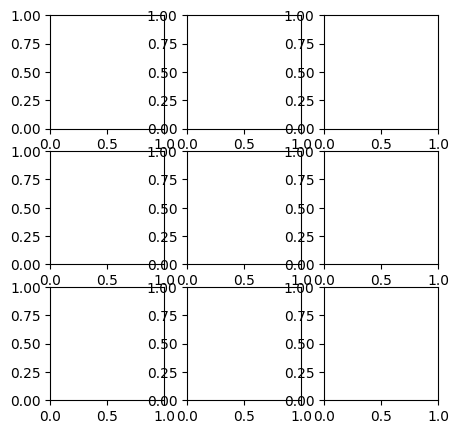

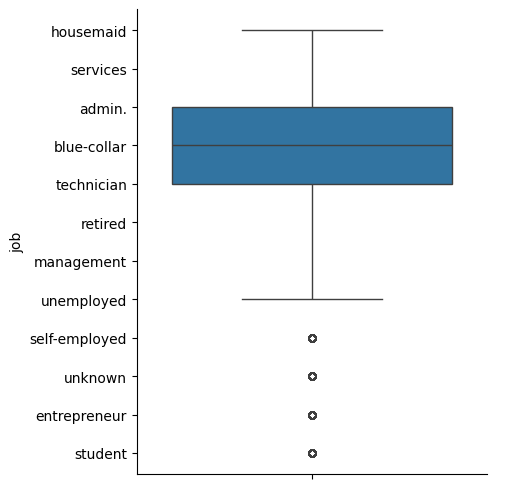

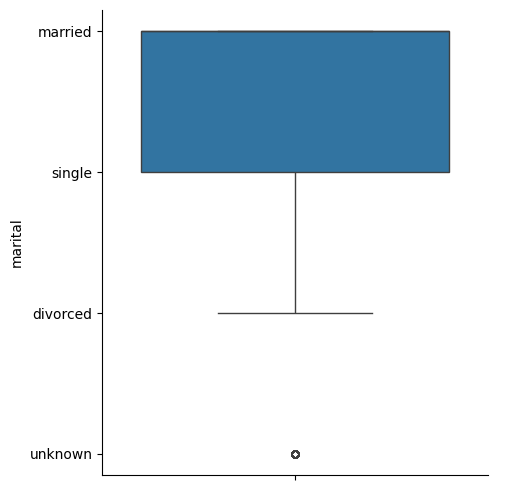

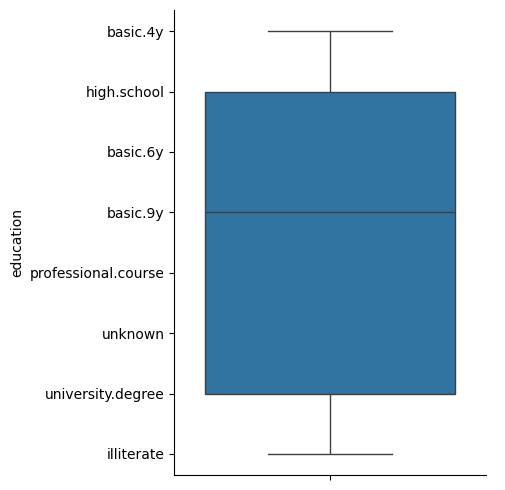

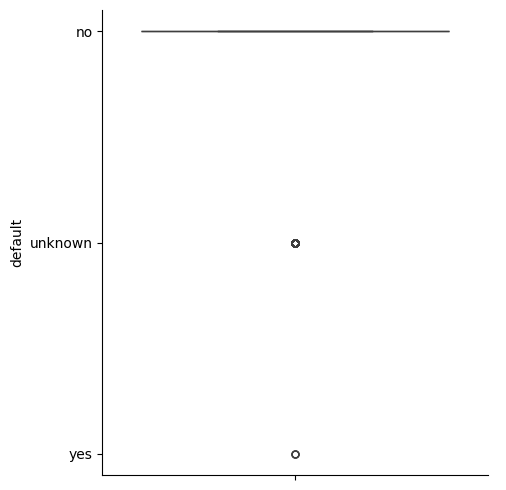

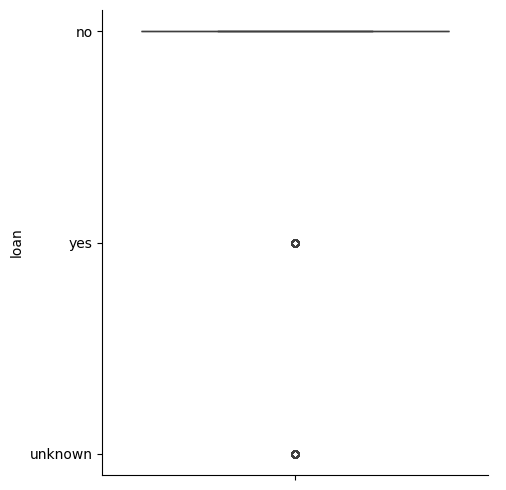

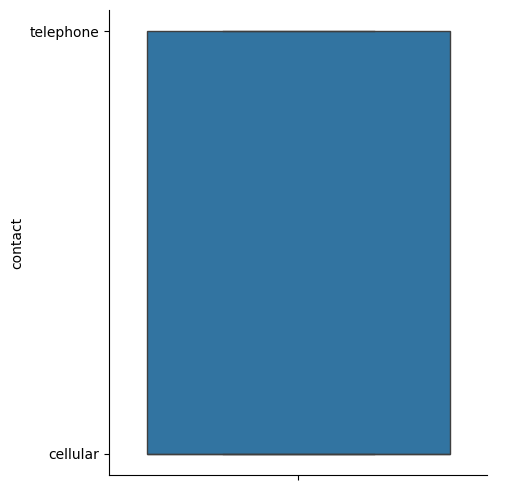

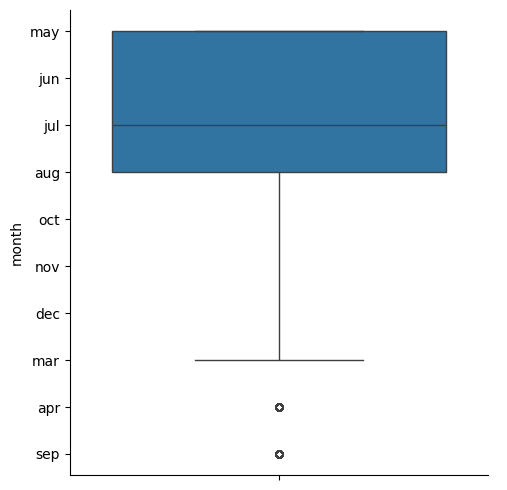

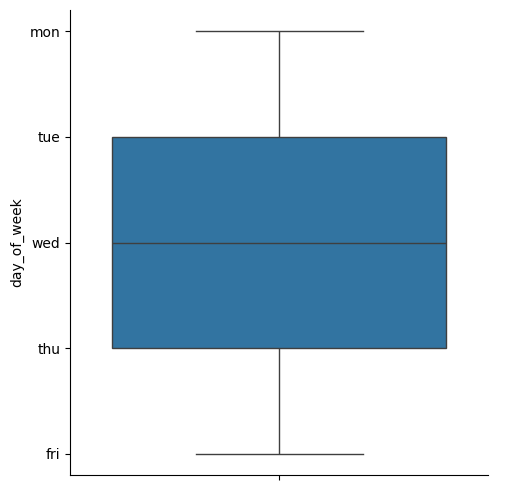

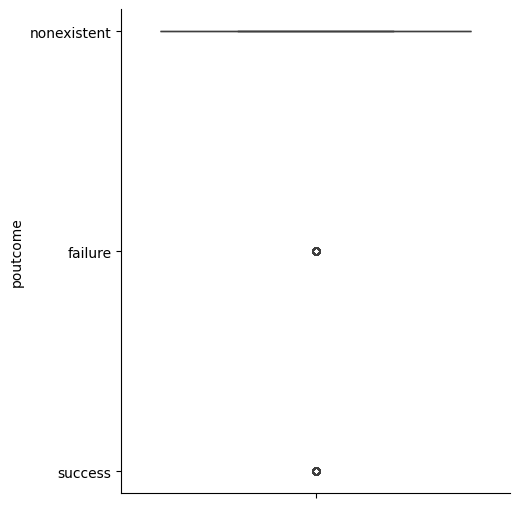

In [ ]:
#scatter plot for the categorical features
X = df[["job", "marital", "education", "default", "loan", "contact", "month", "day_of_week","poutcome"]]
X.head()

fig, axs = plt.subplots(ncols=3, nrows=3,figsize=(5, 5))
index = 0
axs = axs.flatten()
ax.autoscale()
for k,v in X.items():
    sns.catplot(y=k, data=X, kind="box")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



In [ ]:
# remove outliers from the data relating to categorical data
#From the box plot of the categorical varaiable we can remove oiúliers as fowlkes_mallows_score
df = df[~((df['poutcome'] =='failure') | (df['poutcome']  == 'success'))]
df = df[~((df['month'] =='apr') | (df['poutcome']  == 'sept'))]
df = df[~((df['loan'] =='yes') | (df['loan']  == 'unknown'))]
df = df[~((df['default'] =='yes') | (df['default']  == 'unknown'))]
df = df[~((df['marital'] =='unknown'))]
df = df[~((df['job'] =='sel-employed') | (df['job']  == 'unknown') | (df['job'] == 'entrepreneur') | (df['job']  == 'student'))]

df.head()
print(len(df))



18087


In [ ]:
# one hot encoding of category data
# Assigning numerical values and storing it in another columns
# Create an instance of One-hot-encoder
# Passing encoded columns
# Merge with main

X = df
column_chart = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome" ]
#for colu in column_chart:
gen_new = []
for colu in column_chart:
    X[colu] = X[colu].astype('category')
    new_para = colu + "_new"
    gen_new.append(new_para)
    X[new_para] = X[colu].cat.codes
enc = OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform(
X[gen_new]).toarray())
new_df = X.join(enc_data)
for i in range(0, 40):
    new_df.columns.values[i+17] = ("newname_" + str(i))


new_df.head()




,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,newname_0,newname_1,newname_2,newname_3,newname_4,newname_5,newname_6,newname_7,newname_8,newname_9,newname_10,newname_11,newname_12,newname_13,newname_14,newname_15,newname_16,newname_17,newname_18,newname_19,newname_20,newname_21,newname_22,newname_23,newname_24,newname_25,newname_26,newname_27,newname_28,newname_29,newname_30,newname_31,newname_32,newname_33,newname_34,newname_35,newname_36,newname_37,newname_38,newname_39,28,29,30,31,32,33,34,35,36,37,38,39,40
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2,1,0,0,0,0,1,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,6,1,3,0,1,0,1,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,1,0,0,0,1,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,5,0,0,0,1,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7,2,5,0,1,0,1,5,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
new_df.shape
#print(gen_new)

(18087, 70)

In [ ]:
#drop features no longer required
#drop duration
new_df  = new_df.drop([ "duration"], axis=1)



new_df.shape
new_df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,newname_0,newname_1,newname_2,newname_3,newname_4,newname_5,newname_6,newname_7,newname_8,newname_9,newname_10,newname_11,newname_12,newname_13,newname_14,newname_15,newname_16,newname_17,newname_18,newname_19,newname_20,newname_21,newname_22,newname_23,newname_24,newname_25,newname_26,newname_27,newname_28,newname_29,newname_30,newname_31,newname_32,newname_33,newname_34,newname_35,newname_36,newname_37,newname_38,newname_39,28,29,30,31,32,33,34,35,36,37,38,39,40
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2,1,0,0,0,0,1,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,6,1,3,0,1,0,1,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,1,0,0,0,1,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,5,0,0,0,1,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7,2,5,0,1,0,1,5,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# Random Forest Model
# we use the processed data frame new_df
np.random.seed(0)
# create a new colum to generate a random number between 0 anmd 1 and if that value is less than or equal to 0.75,
# then sets the value of that cell as True, or False otherwise
new_df['is_train'] = np.random.uniform(0,1, len(X)) <= 0.75

# see the top 5 rows
new_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,newname_0,newname_1,newname_2,newname_3,newname_4,newname_5,newname_6,newname_7,newname_8,newname_9,newname_10,newname_11,newname_12,newname_13,newname_14,newname_15,newname_16,newname_17,newname_18,newname_19,newname_20,newname_21,newname_22,newname_23,newname_24,newname_25,newname_26,newname_27,newname_28,newname_29,newname_30,newname_31,newname_32,newname_33,newname_34,newname_35,newname_36,newname_37,newname_38,newname_39,28,29,30,31,32,33,34,35,36,37,38,39,40,is_train
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2,1,0,0,0,0,1,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,True
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,6,1,3,0,1,0,1,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,True
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,1,0,0,0,1,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,True
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,5,0,0,0,1,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,True
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7,2,5,0,1,0,1,5,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,True


In [ ]:
# create two new dataframes, one woth the training rows, one with the test rows
train, test = new_df[new_df['is_train']==True], new_df[new_df['is_train']==False]
# how many observations for traing data and test data
print("No of observations - Training data", len(train))
print("No of observations - Test data", len(test))
train.head()

No of observations - Training data 13612
No of observations - Test data 4475


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,newname_0,newname_1,newname_2,newname_3,newname_4,newname_5,newname_6,newname_7,newname_8,newname_9,newname_10,newname_11,newname_12,newname_13,newname_14,newname_15,newname_16,newname_17,newname_18,newname_19,newname_20,newname_21,newname_22,newname_23,newname_24,newname_25,newname_26,newname_27,newname_28,newname_29,newname_30,newname_31,newname_32,newname_33,newname_34,newname_35,newname_36,newname_37,newname_38,newname_39,28,29,30,31,32,33,34,35,36,37,38,39,40,is_train
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2,1,0,0,0,0,1,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,True
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,6,1,3,0,1,0,1,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,True
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,1,0,0,0,1,5,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,True
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,5,0,0,0,1,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,True
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7,2,5,0,1,0,1,5,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,True


In [ ]:
# create a list of the features
y = train['y']
train  = train.drop([ "y"], axis=1)
train = train.join(y)
features = train.columns[:58]
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train[features], y)
#apply the classifier we trained to the test data
predicted_decision = clf.predict(test[features])
print(predicted_decision)





KeyError: 'y'